# A. Unsupervised Learning (非監督式學習)
* 本組使用之兩張衛星影像為 IKONOS 衛星所拍攝，大小為7200*6000，拍攝地區為時下最流行之中國武漢市 (漢陽區)。拍攝時間分別為2002年2月和2009年6月，為兩張多光譜影像且包含4個波段（B、G、R、NIR）。

### 下圖為4波段組成之偽彩色影像 (2002年)
<img src="hanyang2002.jpg" align="left"/>

### 下圖為4波段組成之偽彩色影像 (2009年)
<img src="hanyang2009.jpg" align="left"/>

## 1. 將兩張多光譜影像匯入 ArcGIS Pro 以非監督式學習進行影像分類 (9種類別)。

### 下圖為非監督式分類後之影像 (2002年)
<img src="unsup2002.png" align="left"/>

### 下圖為非監督式分類後之影像 (2009年)
<img src="unsup2009.png" align="left"/>

* 然而非監督式學習進行影像分類的效果略顯粗糙，因此本組將於下方介紹監督式學習。

# B. Supervised Learning (監督式學習)
* 進行影像分類前以人工判斷挑選出具代表性的訓驗樣本，再進行監督式學習。

### 下圖為監督式分類後之影像 (2002年)
<img src="super2002.png" align="left"/>

### 下圖為監督式分類後之影像 (2009年)
<img src="super2009.png" align="left"/>

# C. Transition Matrix/Confusion Matrix (變遷矩陣/混淆矩陣)

In [19]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

In [20]:
# read the labels of two classified images from the csv matrix

df1 = pd.read_csv('m2002.csv')
df2 = pd.read_csv('m2009.csv')

In [21]:
data1=np.array(df1)
data2=np.array(df2)

In [22]:
data_2002 = data1.reshape(1920)
data_2009 = data2.reshape(1920)

In [23]:
data_2002

array([0, 0, 0, ..., 8, 8, 8], dtype=int64)

In [24]:
data_1 = pd.Series(data_2002)
data_2 = pd.Series(data_2009)

In [25]:
# normalize each element in the matrix (sum of row equals to 1)

df_confusion = pd.crosstab(data_2002, data_2009, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion[3]=0
df_cal = df_confusion[[0,1,2,3,4,5,6,7,8,"All"]]
df_trans = df_confusion[[0,1,2,3,4,5,6,7,8]] / (40*48)
all_value = df_confusion['All']
c_name=[0,1,2,3,4,5,6,7,8,'All']
df_correct = df_cal
for i in c_name:
    df_correct[i] = df_cal[i]/all_value

In [37]:
## element = number of changed pixels
df_confusion

Predicted,0,1,2,4,5,6,7,8,All,3
Actual,,,,,,,,,,
0,412,1,37,6,51,42,52,83,684,0
1,0,6,0,0,0,1,0,6,13,0
2,16,0,240,0,1,3,2,0,262,0
3,31,3,0,0,25,15,27,19,120,0
4,3,0,0,63,1,4,0,0,71,0
5,4,0,0,0,53,0,0,1,58,0
6,57,11,0,0,44,40,21,109,282,0
7,63,7,0,0,11,37,104,54,276,0
8,12,0,0,0,4,5,2,131,154,0


In [27]:
df_trans

Predicted,0,1,2,3,4,5,6,7,8
Actual,,,,,,,,,
0,0.214583,0.000521,0.019271,0.0,0.003125,0.026562,0.021875,0.027083,0.043229
1,0.000000,0.003125,0.000000,0.0,0.000000,0.000000,0.000521,0.000000,0.003125
2,0.008333,0.000000,0.125000,0.0,0.000000,0.000521,0.001563,0.001042,0.000000
3,0.016146,0.001563,0.000000,0.0,0.000000,0.013021,0.007812,0.014063,0.009896
4,0.001563,0.000000,0.000000,0.0,0.032813,0.000521,0.002083,0.000000,0.000000
5,0.002083,0.000000,0.000000,0.0,0.000000,0.027604,0.000000,0.000000,0.000521
6,0.029687,0.005729,0.000000,0.0,0.000000,0.022917,0.020833,0.010937,0.056771
7,0.032813,0.003646,0.000000,0.0,0.000000,0.005729,0.019271,0.054167,0.028125
8,0.006250,0.000000,0.000000,0.0,0.000000,0.002083,0.002604,0.001042,0.068229


In [28]:
df_correct

Predicted,0,1,2,3,4,5,6,7,8,All
Actual,,,,,,,,,,
0,0.602339,0.001462,0.054094,0.0,0.008772,0.074561,0.061404,0.076023,0.121345,1.0
1,0.000000,0.461538,0.000000,0.0,0.000000,0.000000,0.076923,0.000000,0.461538,1.0
2,0.061069,0.000000,0.916031,0.0,0.000000,0.003817,0.011450,0.007634,0.000000,1.0
3,0.258333,0.025000,0.000000,0.0,0.000000,0.208333,0.125000,0.225000,0.158333,1.0
4,0.042254,0.000000,0.000000,0.0,0.887324,0.014085,0.056338,0.000000,0.000000,1.0
5,0.068966,0.000000,0.000000,0.0,0.000000,0.913793,0.000000,0.000000,0.017241,1.0
6,0.202128,0.039007,0.000000,0.0,0.000000,0.156028,0.141844,0.074468,0.386525,1.0
7,0.228261,0.025362,0.000000,0.0,0.000000,0.039855,0.134058,0.376812,0.195652,1.0
8,0.077922,0.000000,0.000000,0.0,0.000000,0.025974,0.032468,0.012987,0.850649,1.0


In [29]:
# delete unnecessary rows and coloumns

df_trans = df_trans.drop(index=["All"])
df_correct = df_correct.drop(index=['All'])
df_correct = df_correct.drop(columns=['All'])

In [30]:
data_trans_name = np.array(df_trans)
data_correct_name = np.array(df_correct)

In [31]:
type_name = ['undefined','parking','water','sparse houses','dense houses','residential region','idle region','vegetation region','industrial region']
df_correct_name=pd.DataFrame(data_correct_name,columns=type_name,index=type_name)
df_trans_name=pd.DataFrame(data_trans_name,columns=type_name,index=type_name)

In [32]:
# 1-parking              2-water            
# 3-sparse houses       4-dense houses      
# 5-residential region   6-idle region      
# 7-vegetation region     8-industrial region
# 0-undefined

In [33]:
df_trans_name

,undefined,parking,water,sparse houses,dense houses,residential region,idle region,vegetation region,industrial region
undefined,0.214583,0.000521,0.019271,0.0,0.003125,0.026562,0.021875,0.027083,0.043229
parking,0.000000,0.003125,0.000000,0.0,0.000000,0.000000,0.000521,0.000000,0.003125
water,0.008333,0.000000,0.125000,0.0,0.000000,0.000521,0.001563,0.001042,0.000000
sparse houses,0.016146,0.001563,0.000000,0.0,0.000000,0.013021,0.007812,0.014063,0.009896
dense houses,0.001563,0.000000,0.000000,0.0,0.032813,0.000521,0.002083,0.000000,0.000000
residential region,0.002083,0.000000,0.000000,0.0,0.000000,0.027604,0.000000,0.000000,0.000521
idle region,0.029687,0.005729,0.000000,0.0,0.000000,0.022917,0.020833,0.010937,0.056771
vegetation region,0.032813,0.003646,0.000000,0.0,0.000000,0.005729,0.019271,0.054167,0.028125
industrial region,0.006250,0.000000,0.000000,0.0,0.000000,0.002083,0.002604,0.001042,0.068229


In [34]:
# substitiue the class name for the index

df_correct_name

,undefined,parking,water,sparse houses,dense houses,residential region,idle region,vegetation region,industrial region
undefined,0.602339,0.001462,0.054094,0.0,0.008772,0.074561,0.061404,0.076023,0.121345
parking,0.000000,0.461538,0.000000,0.0,0.000000,0.000000,0.076923,0.000000,0.461538
water,0.061069,0.000000,0.916031,0.0,0.000000,0.003817,0.011450,0.007634,0.000000
sparse houses,0.258333,0.025000,0.000000,0.0,0.000000,0.208333,0.125000,0.225000,0.158333
dense houses,0.042254,0.000000,0.000000,0.0,0.887324,0.014085,0.056338,0.000000,0.000000
residential region,0.068966,0.000000,0.000000,0.0,0.000000,0.913793,0.000000,0.000000,0.017241
idle region,0.202128,0.039007,0.000000,0.0,0.000000,0.156028,0.141844,0.074468,0.386525
vegetation region,0.228261,0.025362,0.000000,0.0,0.000000,0.039855,0.134058,0.376812,0.195652
industrial region,0.077922,0.000000,0.000000,0.0,0.000000,0.025974,0.032468,0.012987,0.850649


## 1. Transition Matrix 
* element = number of changed pixels in each class / sum of all pixels
* sum of each element = 1
* x-axis = image of 2009
* y-axis = image of 2002

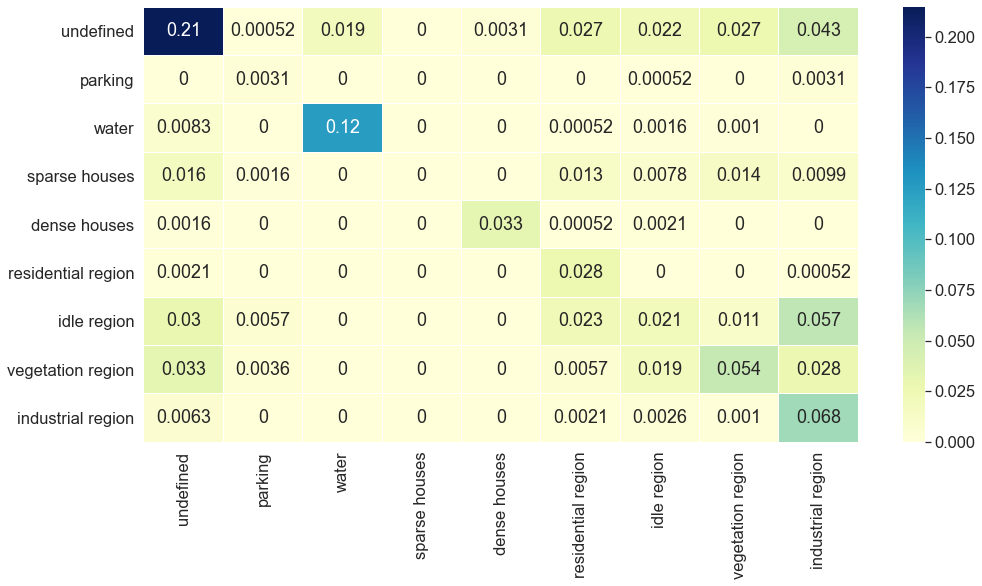

In [35]:
# Transition Matrix Visualizing

import matplotlib.pyplot as plt
import seaborn as sn
sn.set(font_scale=1.5)
f, ax = plt.subplots(figsize = (16, 8))
svm = sn.heatmap(df_trans_name, annot=True, cmap="YlGnBu", linewidths = 0.05, ax = ax)
figure = svm.get_figure() 
figure.savefig('svm_trans.png', dpi=400)
plt.show()

## 2. Confusion Matrix 
* element = number of changed pixels / sum of pixels in each class in 2002
* sum of each row element = 1
* x-axis = image of 2009
* y-axis = image of 2002

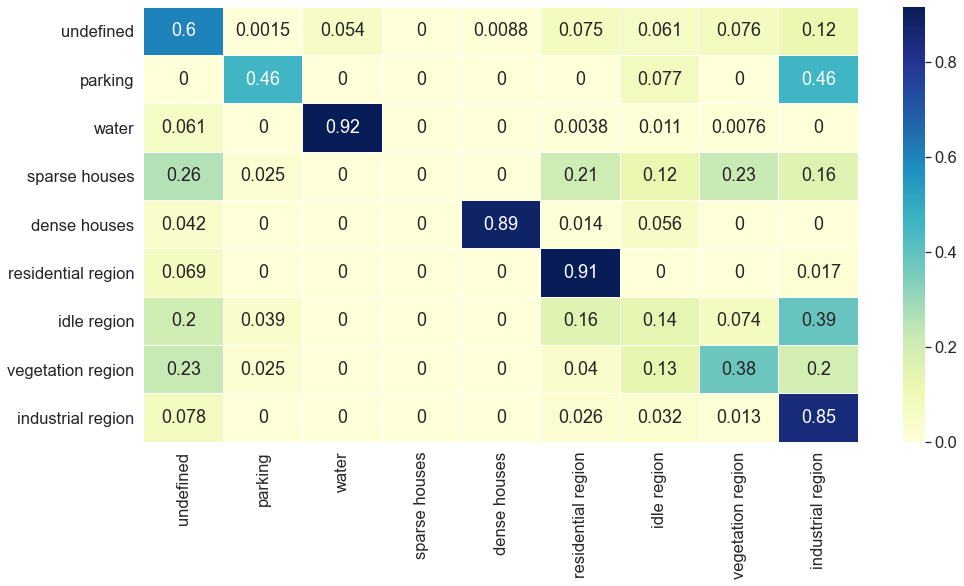

In [36]:
# Confusion Matrix Visualizing

import matplotlib.pyplot as plt
import seaborn as sn
sn.set(font_scale=1.5)
f, ax = plt.subplots(figsize = (16, 8))
svm = sn.heatmap(df_correct_name, annot=True, cmap="YlGnBu", linewidths = 0.05, ax = ax)
figure = svm.get_figure() 
figure.savefig('svm_conf.png', dpi=400)
plt.show()

### 組員名單：
* 106207411 地三土測 李睿莆
* 105207445 地四土測 柯騰達